In [117]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers 

In [118]:
df = pd.read_csv('Classify-2DwLabels-2.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Class
0,-0.33,-0.62,1
1,0.89,-0.67,-1
2,0.98,-0.26,-1
3,-0.55,0.38,1
4,0.43,0.47,-1


In [119]:
train_size = int(0.8 * len(df))
train_set = df[:train_size]
test_set = df[train_size:]

In [120]:
train_set.head()

,Col1,Col2,Class
0,-0.33,-0.62,1
1,0.89,-0.67,-1
2,0.98,-0.26,-1
3,-0.55,0.38,1
4,0.43,0.47,-1


In [121]:
test_set.head()

,Col1,Col2,Class
200,0.24,-0.15,-1
201,-0.71,0.87,1
202,-0.97,-0.24,1
203,-0.03,0.95,-1
204,-0.58,-0.62,1


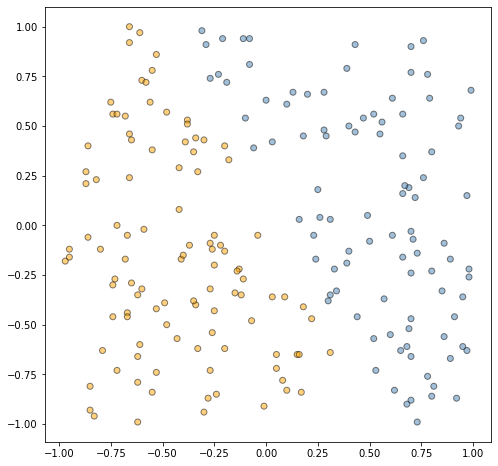

In [122]:
X_train = train_set[["Col1", "Col2"]].to_numpy()
y_train = train_set[["Class"]].to_numpy()
X_test = test_set[["Col1", "Col2"]].to_numpy()
y_test = test_set[["Class"]].to_numpy()
plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.show()

In [123]:
n_samples, n_features = X_train.shape
K = np.dot(X_train, X_train.T)

In [124]:
n = X_train.shape[0]
H = np.dot(y_train*X_train, (y_train*X_train).T)
q = np.repeat([-1.0], n)[..., None]
A = y_train.reshape(1, -1)
b = 0.0
G = np.negative(np.eye(n))
h = np.zeros(n)
A = A.astype('float')

In [125]:
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [126]:
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])

     pcost       dcost       gap    pres   dres
 0: -5.1960e+01 -1.1255e+02  7e+02  2e+01  2e+00
 1: -1.1700e+02 -1.2092e+02  3e+02  1e+01  9e-01
 2: -1.7422e+02 -1.6967e+02  3e+02  1e+01  8e-01
 3: -2.5400e+02 -2.3798e+02  3e+02  1e+01  8e-01
 4: -4.8062e+02 -4.2234e+02  4e+02  9e+00  8e-01
 5: -5.6316e+02 -4.7085e+02  4e+02  7e+00  6e-01
 6: -3.7955e+02 -3.3636e+02  3e+02  3e+00  3e-01
 7: -2.3451e+02 -2.4576e+02  2e+01  7e-02  6e-03
 8: -2.3715e+02 -2.3727e+02  2e-01  7e-04  6e-05
 9: -2.3718e+02 -2.3718e+02  2e-03  7e-06  6e-07
10: -2.3718e+02 -2.3718e+02  2e-05  7e-08  6e-09
Optimal solution found.


In [127]:
w = np.dot((y_train * alphas).T, X_train)[0]

In [128]:
S = (alphas > 1e-5).flatten()
b = np.mean(y_train[S] - np.dot(X_train[S], w.reshape(-1,1)))

In [129]:
print("W:", w)
print("b:", b)

W: [-19.41074548  -9.87868295]
b: 1.0693241038224024


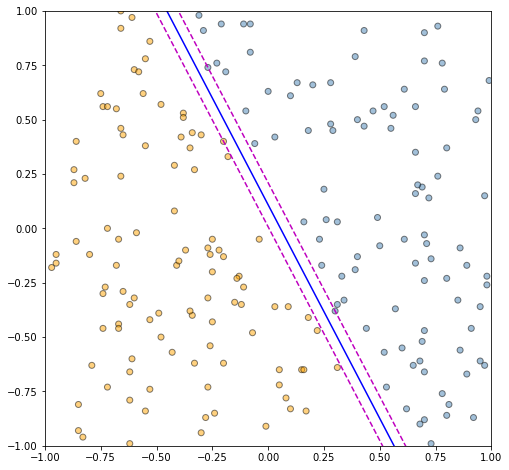

In [130]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#Graphing the train hyperplane and margins with the train data

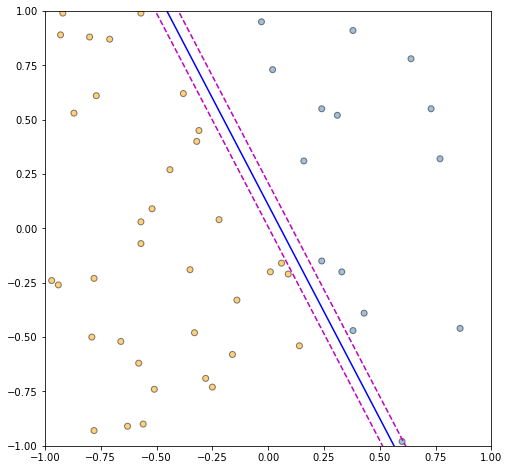

In [131]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#graphing the train hyperplane and margins with the test data

In [144]:
#x points on graph
xx = X_test[:,0]
a = -w[0]/w[1]
#y points as from x values on the hyperplane
yy = a*xx - (b)/w[1]


In [145]:
y_pred = np.zeros(50)
# for predicted values, 1 is when the y values on the graph are
# below the hyperplane and -1 is whhen the y values on the graph are
# above the hyperplane
for x in range(X_test.shape[0]):
    if X_test[x,1] <= yy[x]:
        y_pred[x] = 1
    if X_test[x,1] >= yy[x]:
        y_pred[x] = -1
y_pred = y_pred.astype(int)

In [150]:
loss = 0
# counting number of mismatched
for x in range(X_test.shape[0]):
    if y_pred[x] != y_test[x,0]:
        y_pred[x] - y
    

In [151]:
print("The empirical validation loss is:", loss)

The empirical validation loss is: 0


In [152]:
print("The hyperplane is y =", (-w[0]/w[1]),"x +",-b/w[1])

The hyperplane is y = -1.9649122837549755 x + 0.10824561423278489


In [154]:
print("The margin is: ", margin*2)

The margin is:  0.0918276532942209
